In [1]:
import import_ipynb
import class_new
import importlib
importlib.reload(class_new)



<module 'class_new' from 'C:\\Users\\GJ\\PycharmProjects\\2022SPCUP\\class_new.py'>

In [22]:
import import_ipynb

from class_new import *
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score



known_volume_path = 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1'
unknown_volume_path = './spcup_2022_unseen'



rs = 42
known_path, known_labels = file_path_list(known_volume_path)
unknown_path, unknown_labels = file_path_list(unknown_volume_path)
##train set
# print('raw train_set_num :',len(labels))
X_train_path, X_test_path, y_train_raw, y_test_raw = train_test_split(np.array(known_path),
                                                                      known_labels, test_size=0.2,
                                                                      stratify = known_labels, random_state=rs)

n = 100
n_mels = 64
train = data(X_train_path,y_train_raw,n_mels=n_mels, known = True)

test = data(X_test_path,y_test_raw, n_mels=n_mels, known = True)

unseen =data(unknown_path,unknown_labels, n_mels=n_mels, known = False)

# train = data(X_train_path[:n],y_train_raw[:n],n_mels=n_mels, known = True)

# test = data(X_test_path[:n],y_test_raw[:n], n_mels=n_mels, known = True)

# unseen = data(unknown_path[:n],unknown_labels[:n], n_mels=n_mels, known = False)

for i in [train, test, unseen]:
    i.extract_mel()
    i.reshape_data()



X_train.shape :  (25977, 64, 32, 1)
y_train.shape (25977, 5)
X_train.shape :  (6321, 64, 32, 1)
y_train.shape (6321, 5)
X_train.shape :  (6278, 64, 32, 1)


In [4]:
with open("part1_label6_train.p", 'rb') as f:
    train = pickle.load(f)
with open("part1_label6_test.p", 'rb') as f:
    test = pickle.load(f) 
with open("part1_label6_test.p", 'rb') as f:
    unseen = pickle.load(f) 

FileNotFoundError: [Errno 2] No such file or directory: 'part1_label6_train.p'

In [3]:
X_train = train.X_reshaped
y_train = train.y_reshaped
X_test = test.X_reshaped
y_test = test.y_reshaped
X_unseen = unseen.X_reshaped

for i in [X_train, y_train, X_test, y_test, X_unseen]:
    print(i.shape)

NameError: name 'train' is not defined

In [21]:
print(np.sum(prediction[2]))

NameError: name 'prediction' is not defined

In [9]:
from scipy.stats import mode

prediction = model.predict(test.X_reshaped)
predicted_classes = np.argmax(prediction, axis=1)
f = 0
test_predict = []
softmax_val = []

for j,i in enumerate(test.file_split_num):
#     print(y_test_raw[j])
#     print(np.round(prediction[f:f + i],3))
#     print(predicted_classes[f:f + i])
#     print('\n')
    softmax_val.append(prediction[f:f + i])
    test_predict.append(mode(predicted_classes[f:f + i])[0][0])
    f += i
    
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test_raw, test_predict)
print('\n\n', cf)

NameError: name 'model' is not defined

In [28]:
from tensorflow.keras.models import load_model
model = load_model('./models_log/11_spcup_best_weight.h5')
# model = load_model('./models_log/40_42_spcup_best_model_act_split.h5')

model_vec = load_model('./models_log/11_spcup_best_weight.h5')

model_vec.pop()
model_vec.compile()
model_vec.summary()

def ext_soft(data, model, model_vec, n_round = 5):
    

    prediction_soft = model.predict(data.X_reshaped)
    prediction_vec = model_vec.predict(data.X_reshaped)

#     prediction_soft = model.predict(data.X_mel_cqt)
#     prediction_vec = model_vec.predict(data.X_mel_cqt)
#     predicted_classes = np.argmax(prediction_soft, axis=1)
    

    
    f = 0
    softmax_val = []
    test_predict = []
    for j,i in enumerate(data.file_split_num):
        mean_vec = np.mean(prediction_vec[f:f + i],axis = 0)    
#         mean_soft = np.mean(prediction_soft[f:f + i],axis = 0) 
#         mean_soft = np.mean(prediction[f:f + i],axis = 0)
#         mean_soft = np.mean(np.power(prediction[f:f + i],2),axis = 0)
        
        softmax_val.append(np.round(mean_vec,n_round))
#         test_predict.append(mode(predicted_classes[f:f + i])[0][0])
        predicted_classes = np.argmax(np.mean(prediction_soft[f:f + i],axis = 0))
        test_predict.append(predicted_classes)
        f += i
    return np.array(softmax_val), np.array(test_predict)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_15 (Batc (None, 64, 32, 1)         4         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 32, 16)        416       
_________________________________________________________________
batch_normalization_16 (Batc (None, 64, 32, 16)        64        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 32, 32)        12832     
_________________________________________________________________
batch_normalization_17 (Batc (None, 64, 32, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 6, 64)        

In [31]:
# def ext_soft(data, n_round = 5):

#     prediction = model.predict(data.X_reshaped)
    
#     predicted_classes = np.argmax(prediction, axis=1)
    
#     f = 0
#     softmax_val = []
#     test_predict = []

#     for j,i in enumerate(data.file_split_num):
#         mean_soft = np.mean(prediction[f:f + i],axis = 0)
# #         mean_soft = np.mean(np.power(prediction[f:f + i],2),axis = 0)
        
#         softmax_val.append(np.round(mean_soft,n_round))
        
#         test_predict.append(mode(predicted_classes[f:f + i])[0][0])
        
# #         predicted_classes = np.argmax(np.mean(np.power(prediction[f:f + i],1),axis = 0))
# #         test_predict.append(predicted_classes)
        
#         f += i
#     return np.array(softmax_val), np.array(test_predict)


test_soft, test_predict = ext_soft(test,model, model_vec)
unseen_soft, unseen_predict = ext_soft(unseen, model, model_vec)
train_soft, train_predict = ext_soft(train, model, model_vec)
# split_soft = model.predict(train.X_reshaped, model, model_vec)


# 

#round 5로 했을 때 최고
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
test_sc = scaler.fit_transform(test_soft)
unseen_sc = scaler.fit_transform(unseen_soft)
train_sc = scaler.fit_transform(train_soft)
# split_sc = scaler.fit_transform(split_soft)


print(test_soft.shape)
print(unseen_soft.shape)
print(train_soft.shape)
# print(split_soft.shape)

print(test_sc[:3])
print(train_sc[:3])
print(unseen_sc[:3])

(1000, 5)
(1000, 5)
(4000, 5)
[[-0.03387003  1.2315722   0.01297191 -0.85766655 -0.44824702]
 [-0.27641633 -0.13666376 -0.5001612   2.4914312  -0.24646364]
 [ 3.8505833  -2.6760283   0.9084797  -2.3352098   0.43299106]]
[[-0.6312469   1.4167331  -0.01890257  0.19224563 -0.47341967]
 [ 0.65189695 -1.0166482  -0.2261346  -0.47576687  2.5576873 ]
 [ 0.2649213  -0.12115838 -0.16691872 -0.04254059  2.9701376 ]]
[[-0.1015535   1.0994318  -0.51473475  0.17322037  0.52942216]
 [-0.5339247  -0.20423564 -0.46106812  0.5110365   0.40339318]
 [-0.17128901 -0.55130315 -0.49516973  0.5793978   0.58910704]]


0.03
(4000, 5)
[0.37390968 0.37391    0.3739101  0.37390953 0.3739098 ]
all time :  3.000723123550415
0.0005691233854152788
0.0001683770226932309


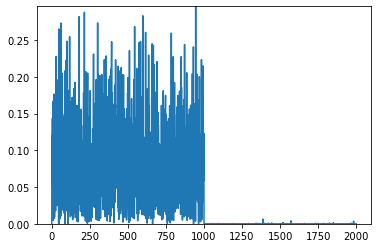

1.126829226605131e-09
1000
750
250
1.172995269690604e-05
999
97
904
4.2523469191769705e-05
998
59
943
0.00016354703456383972
997
32
971
0.00026748250577278047
996
30
974
0.0003549629991857428
995
27
978
0.0004523808596694264
994
19
987
0.000540705084632888
993
16
991
0.0007580664958456323
992
10
998
0.0007828645587524326
991
10
999
0.0009288266012988347
990
8
1002
0.001072215562824418
989
7
1004
0.0011587314755987406
988
7
1005
0.0018556457014629484
987
3
1010
0.0023001876544383798
986
3
1011
0.0025559221049075887
985
3
1012
0.0026184338216065344
984
3
1013
0.0029937096995949477
983
3
1014
0.0030539227332145097
982
3
1015
0.0035272023447695993
981
3
1016
0.0035487069688007896
980
3
1017
0.003591167868132744
979
2
1019
0.0037050898453308027
978
2
1020
0.0037217423823216926
977
2
1021
0.0038081323555954664
976
2
1022
0.0038307959493131
975
2
1023
0.004122588845124245
974
1
1025
0.00435149816226177
973
1
1026
0.0046734416264431694
972
1
1027
0.004712188006519995
971
1
1028
0.0047472882591

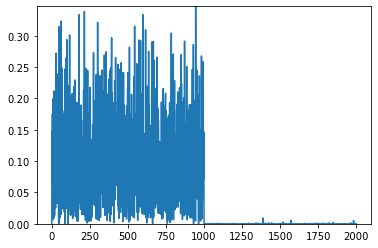

4.1204836851630195e-09
1000
761
239
2.0511594405955575e-05
999
106
895
7.24106334461126e-05
998
65
937
0.00028022351850294996
997
34
969
0.0004559037362934013
996
30
974
0.0005477831767023956
995
27
978
0.0007445295626121728
994
20
986
0.0008830889242539466
993
16
991
0.0011059122031798567
992
12
996
0.0012666550580990486
991
10
999
0.0014007227972175425
990
9
1001
0.0015408571401092216
989
9
1002
0.001893613307759653
988
6
1006
0.0027163467342824674
987
3
1010
0.003431782800549978
986
3
1011
0.003753960214520802
985
3
1012
0.003919338478856783
984
3
1013
0.004180524084141572
983
3
1014
0.004587935944729178
982
3
1015
0.004589088548212241
981
3
1016
0.004596658456476041
980
3
1017
0.0046562330531851924
979
3
1018
0.005225993408302714
978
3
1019
0.005276416775883566
977
3
1020
0.005433154174241087
976
2
1022
0.005482901962971849
975
2
1023
0.005613626718203914
974
2
1024
0.005724730330661753
973
2
1025
0.005792350193283046
972
2
1026
0.00650118567402188
971
1
1028
0.0065255982298315345


In [15]:
import time
def make_pdf_eval(data, pa):
    var_type = 'o' * data.shape[1]

    std_feature = np.std(data, axis=0)
    print(data.shape)
    d = data.shape[1]
    feature_length = data.shape[0]
    c = (4 / (d + 2) / feature_length) ** (1 / (d + 4))
    bw = std_feature * c
    print(bw)
#     print(bw.shape)
    # bw = bw.transpose()

    bw = bw * pa
    dens = sm.nonparametric.KDEMultivariate(data=data, var_type=var_type, bw=bw * pa)
    return dens


for pa in np.arange(0.03,0.04,0.01):
# for pa in [2.6000000000000014]:
    print(pa)
#     dens = make_pdf_eval(split_sc, pa)
    dens = make_pdf_eval(train_sc, pa)
    
    all_time = time.time()
    pdf_t = dens.pdf(test_sc)
    pdf_u = dens.pdf(unseen_sc)
#     pdf_tr = dens.pdf(split_sc)
    pdf_tr = dens.pdf(train_sc)
    

    pdf_all =  np.concatenate((pdf_t,pdf_u),axis = 0)
    print('all time : ', time.time() -all_time)
    
    print(max(pdf_tr))
    print(max(pdf_t))
    pdf_all = pdf_all/max(pdf_tr)
    pdf_at = pdf_all[:pdf_t.size]
    pdf_au = pdf_all[pdf_t.size:]
#     print(len(pdf_at[pdf_at == min(pdf_all)]))
    
    plt.plot(pdf_all)
    plt.ylim([np.min(pdf_all),np.sort(pdf_at)[-1]])
#     plt.ylim([np.min(pdf_all),np.max(pdf_)[-8]])
    
    plt.show()
    for i in np.unique(pdf_at)[:50]:
        print(i)
        print(len(pdf_at[pdf_at >= i]))
        print(len(pdf_au[pdf_au >= i]))
        print(len(pdf_at[pdf_at < i])+len(pdf_au[pdf_au < i]))
       
    print('----------------------------------')

0.03
(4000, 5)
[0.54933596 0.4470912  0.19483629 0.57301164 0.45499063]
all time :  2.9426755905151367
0.000547494566383107
0.00013452512063612208


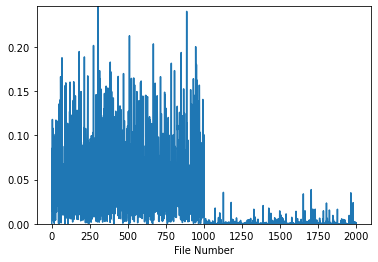

7.878498646946078e-11
1000
986
14
1.8511701265496755e-06
999
713
288
2.3653846615070887e-05
998
502
500
0.00014527917322074157
997
327
676
0.00014940720613892397
996
320
684
0.00016971811810798185
995
308
697
0.00022903786607884416
994
277
729
0.0002374230073426877
993
274
733
0.0002594204323712014
992
266
742
0.00027294890545184974
991
260
749
0.000346868410751582
990
237
773
0.00035703396202503714
989
237
774
0.0004322497529891639
988
216
796
0.0004403264222426081
987
214
799
0.0004939126910943922
986
202
812
0.0005773564230583585
985
193
822
0.0006708490721502962
984
178
838
0.0007484459991296526
983
166
851
0.0008848459648195887
982
159
859
0.0009785665751252995
981
153
866
0.0010518553171998915
980
148
872
0.0011228848497368263
979
143
878
0.0012124282831656068
978
142
880
0.0012314235890014786
977
139
884
0.0014066921137354308
976
134
890
0.001426629317293124
975
133
892
0.00160937472830338
974
122
904
0.0016959094579367074
973
120
907
0.0017869506498927247
972
115
913
0.00180977

In [32]:
import time
def make_pdf_eval(data, pa):
    var_type = 'o' * data.shape[1]

    std_feature = np.std(data, axis=0)
    print(data.shape)
    d = data.shape[1]
    feature_length = data.shape[0]
    c = (4 / (d + 2) / feature_length) ** (1 / (d + 4))
    bw = std_feature * c
    print(bw)
#     print(bw.shape)
    # bw = bw.transpose()

    bw = bw * pa
    dens = sm.nonparametric.KDEMultivariate(data=data, var_type=var_type, bw=bw * pa)
    return dens

for pa in [0.03]:
# for pa in [2.6000000000000014]:
    print(pa)
#     dens = make_pdf_eval(split_sc, pa)
    dens = make_pdf_eval(train_sc, pa)
    
    all_time = time.time()
    pdf_t = dens.pdf(test_sc)
    pdf_u = dens.pdf(unseen_sc)
#     pdf_tr = dens.pdf(split_sc)
    pdf_tr = dens.pdf(train_sc)
    

    pdf_all =  np.concatenate((pdf_t,pdf_u),axis = 0)
    print('all time : ', time.time() -all_time)
    
    print(max(pdf_tr))
    print(max(pdf_t))
    pdf_all = pdf_all/max(pdf_tr)
    pdf_at = pdf_all[:pdf_t.size]
    pdf_au = pdf_all[pdf_t.size:]
#     print(len(pdf_at[pdf_at == min(pdf_all)]))
    
    plt.plot(pdf_all)
    plt.ylim([np.min(pdf_all),np.sort(pdf_at)[-1]])
    plt.xlabel('File Number')
#     plt.ylim([np.min(pdf_all),np.max(pdf_)[-8]])
    
    plt.show()
    for i in np.unique(pdf_at)[:50]:
        print(i)
        print(len(pdf_at[pdf_at >= i]))
        print(len(pdf_au[pdf_au >= i]))
        print(len(pdf_at[pdf_at < i])+len(pdf_au[pdf_au < i]))
       
    print('----------------------------------')

0.8
(4000, 5)
[0.14953832 0.14231423 0.1395225  0.14705856 0.14952542]
all time :  3.231940984725952
0


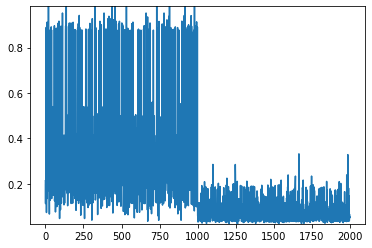

0.034627716371334084
1000
879
0.038772113314234295
999
770
0.03901006477902058
998
763
0.039339460120881166
997
758
0.046605584658034514
996
666
0.04663331468204001
995
666
0.04933320522217983
994
637
0.05795983575484342
993
560
0.06111331755029269
992
531
0.06316552687648959
991
523
0.06355655649411303
990
520
0.06368798545987593
989
519
0.06410205837948536
988
515
0.06627741282613199
987
500
0.06699698091671487
986
494
0.06783038231933053
985
491
0.07007502064151931
984
478
0.07075044254254041
983
469
0.07307662583635728
982
460
0.0737592425748347
981
453
0.07394218792194747
980
453
0.07557875338073546
979
439
0.07791107954700169
978
424
0.08016272073250257
977
413
0.08267348271316656
976
397
0.08328619281811298
975
395
0.08414167824929564
974
387
0.08457606474386274
973
383
0.08580950967509807
972
378
0.08839156617766795
971
367
0.0907267625660202
970
350
0.09126701436159375
969
350
0.09284021236102381
968
343
0.09325156069125161
967
342
0.09448112420807006
966
336
0.094643146412773

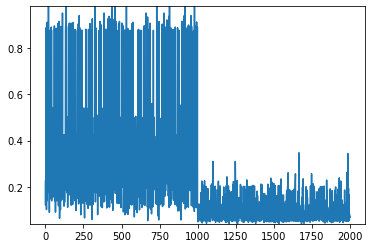

0.05362147908209183
1000
824
0.0563995106618368
999
772
0.05658362969517157
998
767
0.05847780963506474
997
733
0.06364075677040087
996
669
0.06544343603170742
995
648
0.06989212331988798
994
597
0.07382570589032338
993
576
0.0787579777005542
992
539
0.07898575496534656
991
538
0.07945521183020653
990
535
0.07958054183197186
989
533
0.08066110436196393
988
524
0.08330511963697004
987
507
0.08744188349989875
986
470
0.08765577710877913
985
468
0.08951493522354122
984
453
0.09052785680381216
983
446
0.09134748016215251
982
439
0.09345525813005777
981
429
0.09507289875994124
980
422
0.09563305534306943
979
415
0.09714623915220642
978
404
0.09832175034188846
977
398
0.10025283629522744
976
385
0.10151283974189916
975
378
0.10160229357027943
974
377
0.10195569007391944
973
376
0.1033368805543408
972
369
0.104074205097961
971
366
0.10662686825533037
970
350
0.1068087067760209
969
349
0.10848435315975738
968
345
0.10896225421893636
967
343
0.11005800059834871
966
335
0.11014741879294092
965
3

In [458]:
for pa in [0.8, 1]:
    print(pa)
    dens = make_pdf_eval(train_soft, pa)

    all_time = time.time()
    pdf_t = dens.pdf(test_soft)
    pdf_u = dens.pdf(unseen_soft)
    pdf_tr = dens.pdf(train_soft)
    pdf_all =  np.concatenate((pdf_t,pdf_u),axis = 0)
    print('all time : ', time.time() -all_time)
    
    pdf_all = pdf_all/max(pdf_tr)
    pdf_at = pdf_all[:1000]
    pdf_au = pdf_all[1000:]
    print(len(pdf_at[pdf_at == min(pdf_all)]))
    
    plt.plot(pdf_all)
#     plt.ylim([np.min(pdf_all),np.sort(pdf_all)[-8]])
    plt.ylim([np.min(pdf_all),np.sort(pdf_at)[-8]])
    
    plt.show()
    
    for i in np.unique(pdf_at)[:50]:
        print(i)
        print(len(pdf_at[pdf_at >= i]))
        print(len(pdf_au[pdf_au >= i]))


In [20]:
i = 0.00075
no = np.where(pdf_at<i)
print(X_test_path[no])
no_un = np.where(pdf_au>i)
print(np.array(unknown_path)[no_un])

['C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1/9627b6cfdb8c70cbf1635b24e6d7e716.wav'
 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1/1cbeee10da54e860fde5481934872d28.wav'
 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1/99c8329c4452e844340f0fe61a407e81.wav'
 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1/8891093b1ddf8e9b1f2de952d03b5de8.wav'
 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1/976c2801f12fb46f2020b3dfa76fb417.wav'
 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1/228de50c4dd6b4e1f296cc1feeb2b66a.wav'
 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1/3c95f2fc45f05f12d648ffe24ad0613b.wav']
['./spcup_2022_unseen/2cb47484f2d295a138f180e008f8aae0.wav'
 './spcup_2022_unseen/4a303beb055da44e5040804fe0305903.wav'
 './spcup_2022_unseen/55eb0c5fde100e94cc7eb481ece715c9.wav'
 './spcup_2022_unseen/58f492d15df1d7b735e47cdbb76d9265.wav'
 './spcup_2022_unseen/6072069eeea2e5d5337908cdd5f65ad0.wav'

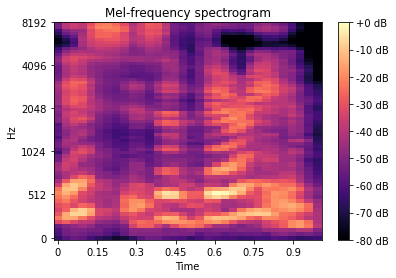

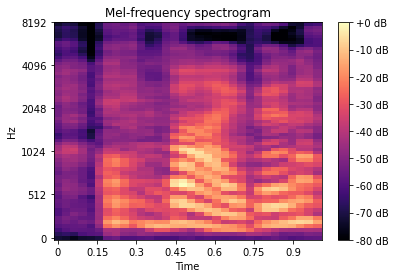

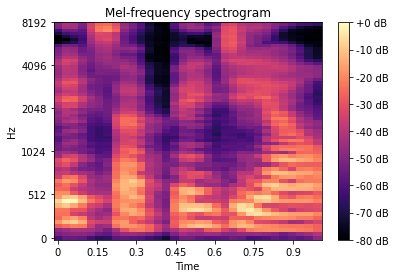

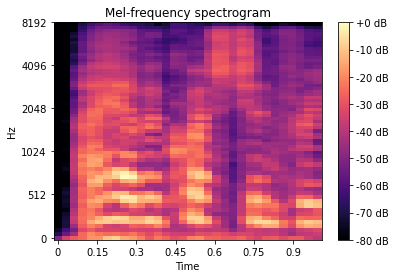

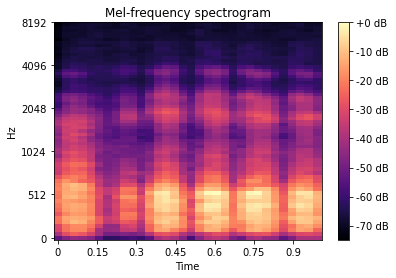

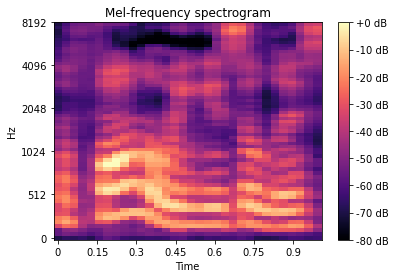

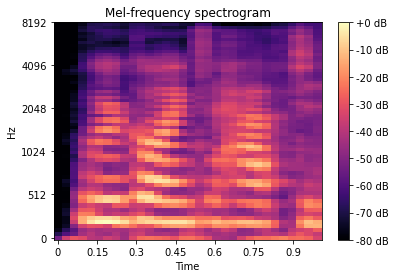

In [24]:
import librosa.display
sampling_rate = 16000
for i, filepath in enumerate(X_test_path[no]):
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr=sampling_rate)
    index_f = 0
#     for j in range(y.size // sampling_rate):
    for j in range(1):
    
        X_aug_seg = y[index_f:index_f + sampling_rate]
        X_aug_seg = np.array(X_aug_seg)
        
#         freqs, bicoh = compute_bicoherence(X_aug_seg, X_aug_seg, 16000)
#         f = plt.figure(figsize = (9, 9))
#         plt.pcolormesh(freqs, freqs, bicoh, )
#         plt.colorbar()
#         plt.clim(0, 0.5)
#         plt.show()
        
               
        S = librosa.feature.melspectrogram(y=X_aug_seg, sr=sampling_rate, n_mels=64, fmax=8000)
        # S_dB = S
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        fig, ax = plt.subplots()
#         S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, x_axis='time',
                                 y_axis='mel', sr=16000,
                                 fmax=8000, ax=ax)
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title='Mel-frequency spectrogram')
#         X_mel_aug.append(S_dB)
    index_f += sampling_rate

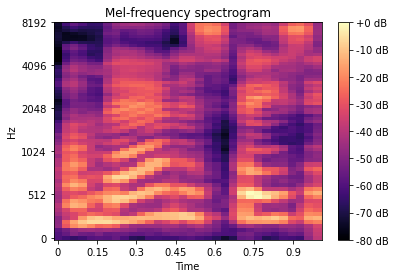

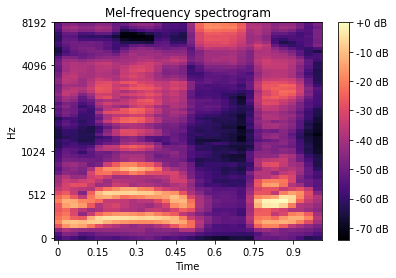

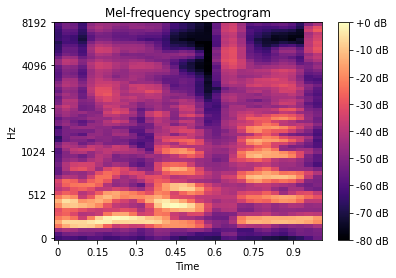

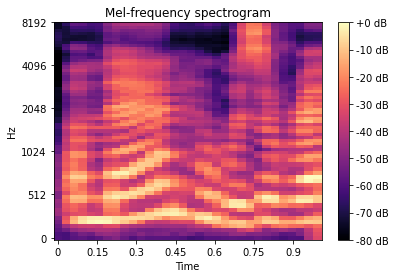

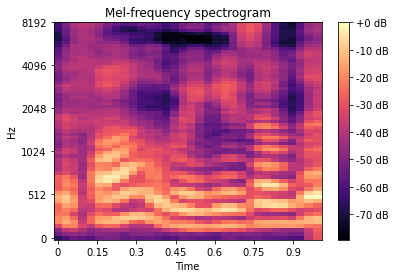

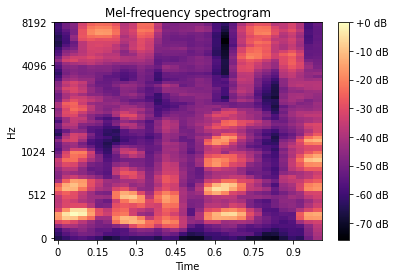

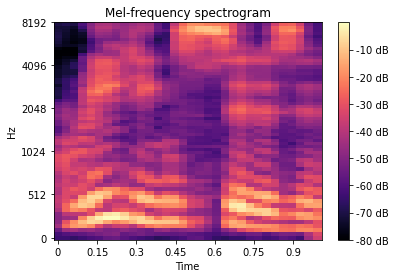

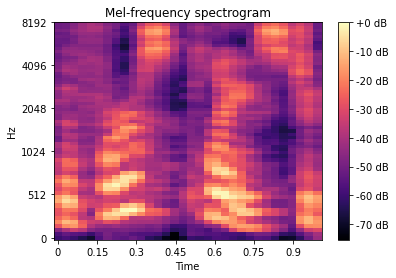

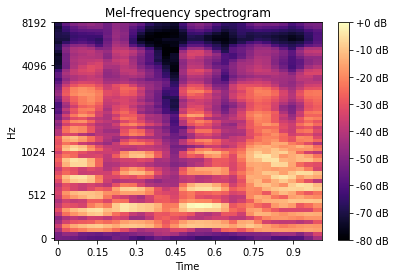

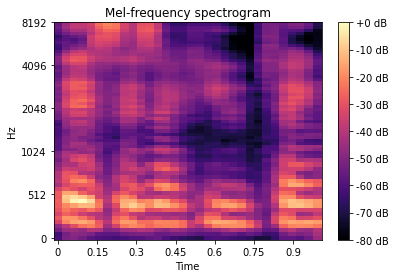

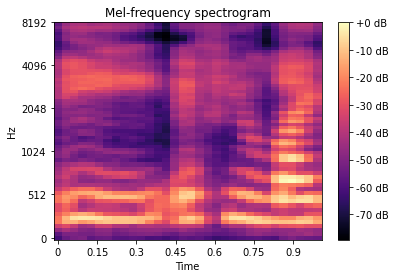

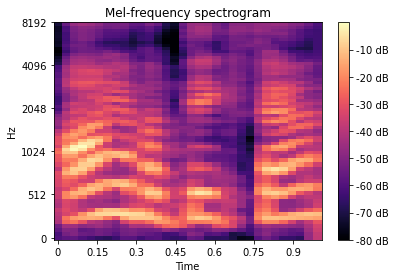

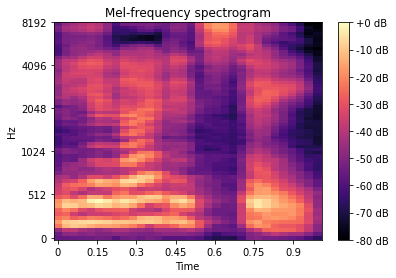

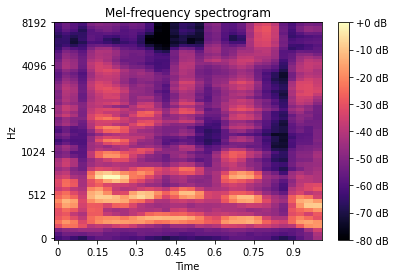

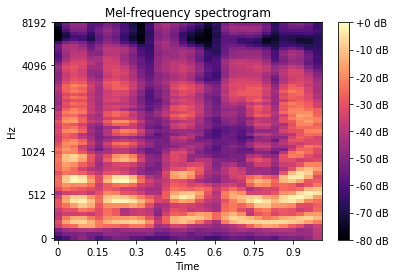

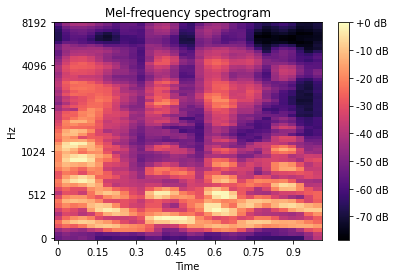

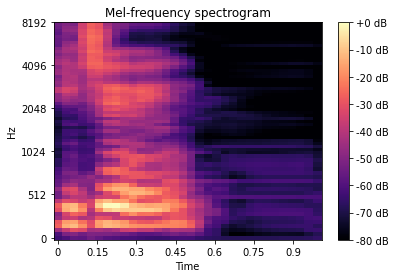

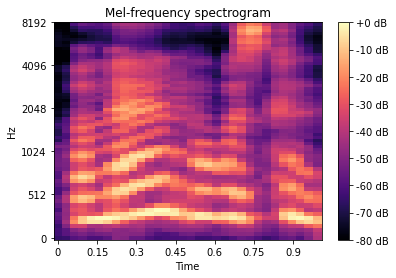

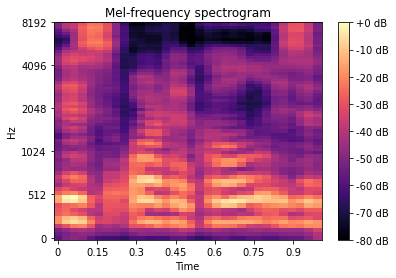

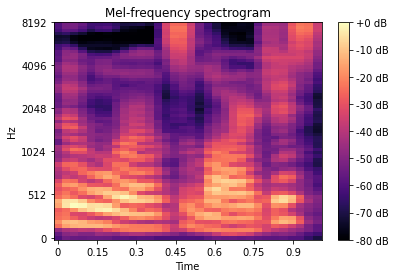

In [23]:
import librosa.display
sampling_rate = 16000
for i, filepath in enumerate(np.array(unknown_path)[no_un]):
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr=sampling_rate)
    index_f = 0
#     for j in range(y.size // sampling_rate):
    for j in range(1):
    
        X_aug_seg = y[index_f:index_f + sampling_rate]
        X_aug_seg = np.array(X_aug_seg)
        
#         freqs, bicoh = compute_bicoherence(X_aug_seg, X_aug_seg, 16000)
#         f = plt.figure(figsize = (9, 9))
#         plt.pcolormesh(freqs, freqs, bicoh, )
#         plt.colorbar()
#         plt.clim(0, 0.5)
#         plt.show()
        
               
        S = librosa.feature.melspectrogram(y=X_aug_seg, sr=sampling_rate, n_mels=64, fmax=8000)
        # S_dB = S
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        fig, ax = plt.subplots()
#         S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, x_axis='time',
                                 y_axis='mel', sr=16000,
                                 fmax=8000, ax=ax)
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title='Mel-frequency spectrogram')
#         X_mel_aug.append(S_dB)
    index_f += sampling_rate

roung 5
962
502

round 7
962
468

val_type = c
pa = 1.2
965
427

val_type = o
n_round = 7
pa = 0.75
970
366


983
446

soft 전 + std , round 5, pa 0.4, val_type = o
980
10

soft 전 + std , round 5, pa 0.05, val_type = o
989
9

soft 전 + std , round 7, pa 0.03, val_type = o
990
10

soft 전 + std , round 7, pa 0.03, val_type = o
990
10

In [376]:
thresh = 1.1851049339765359e-07
print(np.where(pdf_all<thresh)[0])


[   0    1    4   14   17   22   25   31   35   41   55   57   62   66
   75   84   86   90   91   93   96   98  109  110  116  118  122  129
  130  136  142  148  153  161  167  173  174  178  179  197  204  209
  210  217  230  231  234  236  238  239  243  246  249  251  256  257
  269  274  276  278  284  289  293  294  296  301  304  309  311  315
  337  339  340  344  351  355  356  359  364  366  368  374  379  387
  392  394  397  401  403  406  407  410  421  423  425  430  431  436
  437  440  444  450  452  459  460  461  467  475  482  488  489  491
  494  495  496  504  509  512  518  523  527  530  531  544  548  553
  554  558  564  565  569  571  572  596  597  598  599  602  604  614
  616  619  621  631  633  634  636  646  650  657  665  666  667  674
  675  676  677  690  692  693  697  701  708  715  716  720  721  723
  724  729  733  744  750  751  752  753  759  761  765  769  777  784
  785  787  810  814  828  832  835  847  850  851  863  864  869  870
  871 

In [288]:
pdf_at[pdf_at ==np.unique(pdf_at)[-1]]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [260]:
print(pdf_as)

[-8.19551913e-05  4.16973500e-05  9.90962863e-05 -8.19551913e-05
  4.24218329e-05 -1.02822099e-04  9.26478612e-05 -8.28615848e-05
 -8.28615848e-05 -1.12419483e-04 -6.38071552e-05  4.16973500e-05
 -5.86863056e-05 -8.19551913e-05 -6.38071552e-05 -6.38071552e-05
 -8.29482565e-05  4.18727893e-05  4.45753603e-05 -1.12419483e-04
  4.16973500e-05 -9.23346441e-05  1.03829212e-04  9.90962863e-05
 -8.19551913e-05 -5.73517957e-05 -8.28615848e-05 -6.38071552e-05
 -8.31212327e-05 -8.29482565e-05 -1.12419483e-04 -6.30182370e-05
  1.05231244e-04  1.02924395e-04 -8.30513467e-05 -6.38071552e-05
 -1.12419483e-04 -1.06925772e-04  9.66328312e-05 -1.02822099e-04
 -8.28615848e-05 -8.29482565e-05 -5.99234771e-05 -6.38071552e-05
 -5.57869826e-05 -6.38071552e-05  6.12854311e-05 -8.30785116e-05
  4.16973500e-05 -7.05452382e-05  9.45713861e-05 -6.38071552e-05
  4.18727893e-05  5.13130132e-05 -6.38071552e-05 -1.02822099e-04
 -1.02822099e-04 -5.61237352e-05 -5.57869826e-05 -1.02754515e-04
 -6.38071552e-05 -8.28615

In [ ]:
## Coherence extraction

import import_ipynb

from class_new import *
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score



known_volume_path = 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1'
unknown_volume_path = './spcup_2022_unseen'



rs = 42
known_path, known_labels = file_path_list(known_volume_path)
unknown_path, unknown_labels = file_path_list(unknown_volume_path)

import librosa.display 
import numpy as np
sampling_rate = 16000
for i, filepath in enumerate(np.array(known_path)[:10]):
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr=sampling_rate)
    index_f = 0
#     for j in range(y.size // sampling_rate):
    for j in range(1):
    
        X_aug_seg = y[index_f:index_f + sampling_rate]
        X_aug_seg = np.array(X_aug_seg)
        
#         freqs, bicoh = compute_bicoherence(X_aug_seg, X_aug_seg, 16000)
#         f = plt.figure(figsize = (9, 9))
#         plt.pcolormesh(freqs, freqs, bicoh, )
#         plt.colorbar()
#         plt.clim(0, 0.5)
#         plt.show()
        
        f, Cxy = signal.coherence(X_aug_seg, X_aug_seg, 16000, nperseg=1024)
        fig, ax = plt.subplots()
        plt.plot(Cxy)
        uni , count = np.unique(Cxy,return_count = True)
        print(uni, count)
#         S = librosa.feature.melspectrogram(y=X_aug_seg, sr=sampling_rate, n_mels=64, fmax=8000)
#         # S_dB = S
#         S_dB = librosa.power_to_db(S, ref=np.max)
        
#         fig, ax = plt.subplots
#         S_dB = librosa.power_to_db(S, ref=np.max)
#         img = librosa.display.specshow(S_dB, x_axis='time',
#                                  y_axis='mel', sr=16000,
#                                  fmax=8000, ax=ax)
#         fig.colorbar(img, ax=ax, format='%+2.0f dB')
#         ax.set(title='Mel-frequency spectrogram')
#         X_mel_aug.append(S_dB)
    index_f += sampling_rate



# print(pdf_all[:100])
# plt.plot(pdf_u)

In [220]:
print(np.sort(pdf_all))

[2.02875931e-10 2.02875931e-10 2.02875931e-10 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


In [201]:
pdf_at = pdf_all[:1000]
print(len(pdf_at[pdf_at <= min(pdf_all)]))

print(max(pdf_all[1000:]))

749
3.138510027888842e-18


In [105]:
see_pred(unseen)



5
[[0.    0.983 0.017 0.    0.   ]
 [0.    0.878 0.018 0.103 0.   ]
 [0.    0.034 0.966 0.    0.   ]
 [0.    0.979 0.021 0.    0.   ]
 [0.    0.97  0.03  0.    0.   ]]
[1 1 2 1 1]


5
[[0.    0.794 0.206 0.    0.   ]
 [0.    0.717 0.282 0.001 0.   ]
 [0.    0.989 0.011 0.    0.   ]
 [0.    0.857 0.143 0.    0.   ]
 [0.    0.272 0.697 0.031 0.   ]]
[1 1 1 1 2]


5
[[0.    0.766 0.23  0.004 0.   ]
 [0.    0.004 0.996 0.    0.   ]
 [0.    0.015 0.907 0.078 0.   ]
 [0.    0.081 0.001 0.918 0.   ]
 [0.    0.17  0.829 0.001 0.   ]
 [0.    0.632 0.367 0.    0.001]
 [0.    0.001 0.999 0.    0.   ]
 [0.    0.956 0.042 0.001 0.   ]]
[1 2 2 3 2 1 2 1]


5
[[0.    0.156 0.844 0.    0.   ]
 [0.    0.003 0.997 0.    0.   ]
 [0.    0.017 0.983 0.    0.   ]
 [0.    0.942 0.043 0.015 0.   ]
 [0.    0.079 0.92  0.    0.   ]
 [0.    0.97  0.03  0.    0.   ]
 [0.    0.701 0.299 0.    0.   ]]
[2 2 2 1 2 1 1]


5
[[0.    0.446 0.554 0.001 0.   ]
 [0.    0.941 0.058 0.001 0.   ]
 [0.    0.515 0.485 0.    0. 

5
[[0.    0.979 0.021 0.    0.   ]
 [0.    0.964 0.035 0.    0.   ]]
[1 1]


5
[[0.    0.199 0.801 0.    0.   ]
 [0.    0.033 0.945 0.022 0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.041 0.959 0.    0.   ]
 [0.    0.947 0.053 0.    0.   ]
 [0.    0.749 0.251 0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.004 0.996 0.    0.   ]]
[2 2 2 2 1 1 2 2]


5
[[0.    0.    1.    0.    0.   ]
 [0.    0.165 0.835 0.    0.   ]
 [0.    0.48  0.52  0.    0.   ]
 [0.    0.006 0.994 0.    0.   ]]
[2 2 2 2]


5
[[0.    0.001 0.999 0.    0.   ]
 [0.    0.001 0.999 0.    0.   ]
 [0.    0.021 0.979 0.    0.   ]
 [0.    0.873 0.127 0.001 0.   ]
 [0.    0.226 0.774 0.    0.   ]
 [0.    0.002 0.998 0.    0.   ]]
[2 2 2 1 2 2]


5
[[0.    0.055 0.945 0.    0.   ]
 [0.    0.001 0.999 0.    0.   ]
 [0.    0.17  0.812 0.018 0.   ]
 [0.    0.951 0.012 0.037 0.   ]
 [0.001 0.079 0.891 0.027 0.003]
 [0.    0.991 0.009 0.    0.   ]]
[2 2 2 1 2 1]


5
[[0.    0.351 0.649 0.    0.   ]
 [0.    0.001 0.999 

 [0.    0.79  0.21  0.    0.   ]]
[2 2 2 2 2 2 2 1]


5
[[0.    0.67  0.33  0.    0.   ]
 [0.    0.966 0.034 0.    0.   ]]
[1 1]


5
[[0.    0.996 0.004 0.    0.   ]
 [0.002 0.25  0.743 0.    0.005]]
[1 2]


5
[[0.    0.003 0.996 0.    0.   ]
 [0.    0.579 0.421 0.    0.   ]
 [0.    0.9   0.1   0.    0.   ]
 [0.    0.536 0.464 0.    0.   ]
 [0.    0.    0.993 0.006 0.   ]
 [0.    0.005 0.994 0.001 0.   ]
 [0.    0.815 0.185 0.    0.   ]
 [0.    0.984 0.006 0.01  0.   ]]
[2 1 1 1 2 2 1 1]


5
[[0.    0.877 0.123 0.    0.   ]]
[1]


5
[[0.    0.311 0.663 0.026 0.   ]
 [0.    0.995 0.005 0.    0.   ]
 [0.    0.266 0.733 0.001 0.   ]
 [0.    0.887 0.113 0.    0.   ]
 [0.    0.974 0.026 0.    0.   ]
 [0.    0.008 0.992 0.    0.   ]
 [0.    0.604 0.396 0.    0.   ]]
[2 1 2 1 1 2 1]


5
[[0.    0.002 0.998 0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.001 0.998 0.    0.001]
 [0.    0.003 0.997 0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0. 

 [0.    0.894 0.106 0.    0.   ]]
[3 1 2 1 1 2 1 1 1]


5
[[0.    0.99  0.007 0.003 0.   ]
 [0.    0.625 0.371 0.003 0.   ]
 [0.    0.97  0.03  0.    0.   ]
 [0.    0.999 0.001 0.    0.   ]
 [0.    0.    0.999 0.    0.   ]]
[1 1 1 1 2]


5
[[0.    0.929 0.04  0.006 0.025]
 [0.    0.39  0.609 0.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.    0.757 0.243 0.    0.   ]
 [0.    0.999 0.001 0.    0.   ]
 [0.    0.017 0.981 0.001 0.   ]
 [0.    0.877 0.123 0.    0.   ]
 [0.    0.112 0.876 0.011 0.   ]
 [0.    1.    0.    0.    0.   ]]
[1 2 1 1 1 2 1 2 1]


5
[[0.    0.144 0.856 0.    0.   ]
 [0.    0.094 0.906 0.    0.   ]
 [0.    0.937 0.063 0.    0.   ]
 [0.    0.629 0.371 0.    0.   ]
 [0.    0.002 0.998 0.    0.   ]
 [0.    0.998 0.    0.001 0.   ]
 [0.    0.998 0.002 0.    0.   ]
 [0.    0.994 0.    0.006 0.   ]]
[2 2 1 1 2 1 1 1]


5
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[2 2]


5
[[0.    0.521 0.479 0.    0.   ]
 [0.    0.999 0.001 0.    0.   ]
 [0.001 0.002 0.996 0.    0.   ]
 [0. 

In [91]:
len(test_predict)

1000



 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   5 195   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]


In [60]:


prediction = model.predict(X_test)

from scipy.stats import mode
predicted_classes = np.argmax(prediction, axis = 1)
f = 0
test_predict=[]
for i in test.file_split_num:
#     print(predicted_classes[f:f+i])
    test_predict.append(mode(predicted_classes[f:f+i])[0][0])
    f+=i
                    
acc_bool = test_predict==y_test_raw
print(test_predict[:100])
print(y_test_raw[:100])
print(acc_bool[:100])
test_accuracy = acc_bool.tolist().count(True)/len(acc_bool)
print(test_accuracy)
print('test_set.size : ', acc_bool.size)


[1, 1, 1, 1, 0, 0, 0, 2, 3, 4, 4, 0, 1, 3, 4, 4, 0, 4, 1, 1, 0, 1, 4, 0, 1, 2, 2, 1, 2, 3, 2, 0, 1, 4, 3, 3, 1, 1, 0, 4, 0, 4, 1, 1, 4, 3, 4, 0, 3, 2, 4, 4, 3, 1, 2, 3, 1, 1, 0, 0, 2, 4, 4, 4, 0, 3, 2, 3, 4, 4, 1, 0, 3, 3, 0, 1, 3, 0, 4, 0, 1, 0, 3, 0, 2, 1, 2, 1, 4, 0, 3, 2, 3, 2, 4, 3, 2, 4, 1, 2]
[1 1 1 1 0 0 0 2 3 4 4 0 1 3 4 4 0 4 1 1 0 1 4 0 1 2 2 1 2 3 2 0 1 4 3 3 1
 1 0 4 0 4 1 1 4 3 4 0 3 2 4 4 3 1 2 3 1 1 0 0 2 4 4 4 0 3 2 3 4 4 1 0 3 3
 0 2 3 0 4 0 1 0 3 0 2 1 2 1 4 0 3 2 3 2 4 3 2 4 1 2]


<ipython-input-60-5214f044c15a>:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc_bool = test_predict==y_test_raw


TypeError: 'bool' object is not subscriptable

In [28]:


f = 0
for i in test.file_split_num:
    print(np.round(prediction[f:f+i],3))
    print('\n')
    f += i

[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.398 0.    0.    0.    0.602]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.999]
 [0.061 0.    0.    0.    0.939]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.001 0.    0.999]]


[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.977 0.    0.    0.    0.023]
 [1.    0.

 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.208 0.    0.    0.    0.792]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.999]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.977 0.    0.    0.    0.023]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 

 [0.    0.    0.    0.    1.   ]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.979 0.    0.    0.    0.021]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[[0.95  0.    0.    0.    0.05 ]
 [0.025 0.    0.515 0.    0.46 ]
 [1.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.001 0.    0.999]
 [1.    0.    0.    0.    0.   ]]


[[1. 0. 0. 0.